In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#to view the plots in jupyter notebook itself
# to create confusion matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
# to apply logistic regression
from sklearn.linear_model import LogisticRegression

C:\Users\Student\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("student_data_synthetic_extreme_noisy.csv")

In [3]:
#check top records
df.head()

,Marks 1,Marks 2,Admission
0,92.934283,79.481679,1
1,51.234714,56.298354,0
2,74.953771,53.461560,1
3,68.460597,50.233526,0
4,78.316933,83.619990,1


In [4]:
df.tail()

,Marks 1,Marks 2,Admission
45,67.603116,31.729701,1
46,20.787225,73.922406,0
47,83.142445,81.221105,1
48,81.872366,90.102269,1
49,19.739197,59.308257,0


In [6]:
#check info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marks 1    50 non-null     float64
 1   Marks 2    50 non-null     float64
 2   Admission  50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [7]:
#split dataset into features and target variables
feature_cols=['Marks 1','Marks 2']
X=df[feature_cols]#Features
y=df.Admission #Target variable

In [8]:
#finding whether the dataset is imbalanced?
class_counts=df["Admission"].value_counts()
#print class counts
print(class_counts)

Admission
1    35
0    15
Name: count, dtype: int64


<Axes: xlabel='Marks 1', ylabel='Marks 2'>

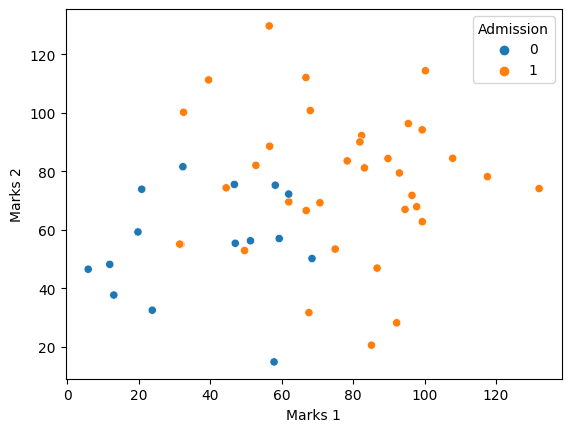

In [10]:
#visulaize the imbalanced data set
import seaborn as sns
sns.scatterplot(x=df['Marks 1'],y=df['Marks 2'],hue=df['Admission'])

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)
X_train.shape

(37, 2)

In [13]:
X_test.shape

(13, 2)

In [15]:
m1=LogisticRegression(
class_weight='balanced',penalty='l2',
solver='lbfgs',max_iter=1000)
#fit the model with data
m1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
m1.score(X_test,y_test)

0.9230769230769231

In [21]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(m1,X,y,cv=5)
print(cv_scores)
print("cross validation Accuracy:",np.mean(cv_scores))

[0.9 0.7 0.9 0.6 0.8]
cross validation Accuracy: 0.78


In [22]:
#prediction on test dataset
y_pred=m1.predict(X_test)
y_test

17    0
2     1
20    1
31    1
24    1
1     0
12    0
8     1
11    1
34    1
33    1
43    0
13    1
Name: Admission, dtype: int64

In [23]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [25]:
new_pred=m1.predict([[60,70]])
new_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [27]:
#confusion matrix
c1=metrics.confusion_matrix(y_pred,y_test)
print(c1)

[[4 1]
 [0 8]]


In [28]:
#evaluation metrices
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.9230769230769231
Precision: 1.0
Recall: 0.8888888888888888
